In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor

In [2]:
train_dataset = MNIST(root="", download=True, transform=ToTensor())
test_dataset = MNIST(root="", download=True, train=False, transform=ToTensor())

In [3]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [4]:
train_set, val_set = random_split(train_dataset, [50000, 10000])

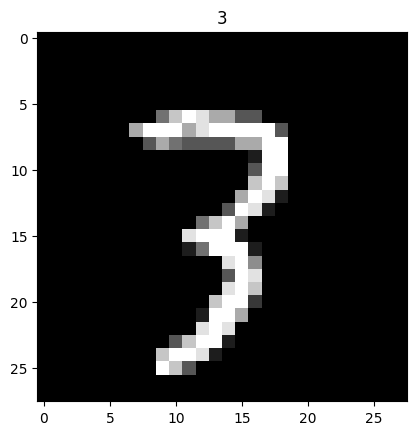

In [5]:
image_sample, label = train_set[3]
plt.imshow(image_sample[0], cmap="gray")
plt.title(label)
plt.show()

In [6]:
# creating dataloaders

train_loader = DataLoader(train_set,batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64)
test_loader = DataLoader(test_dataset,batch_size=64)

In [7]:
class MyModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 10)

  def forward(self, X):
    flatten = nn.Flatten()(X)
    x = self.fc1(flatten)
    return x


In [8]:
EPOCHS = 10


model = MyModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []
val_losses = []

for _ in range(EPOCHS):

  mini_batch_loss_train = []
  mini_batch_loss_val = []

  for x_batch, y_batch in train_loader:
    model.train()
    y_pred = model(x_batch)
    loss = loss_fn(y_pred, y_batch)
    mini_batch_loss_train.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  losses.append(np.mean(mini_batch_loss_train))

  for x_val_batch, y_val_batch in val_loader:

    model.eval()

    with torch.no_grad():

      y_pred = model(x_val_batch)

      val_loss = loss_fn(y_pred, y_val_batch)

      mini_batch_loss_val.append(val_loss.item())
  val_losses.append(np.mean(mini_batch_loss_val))


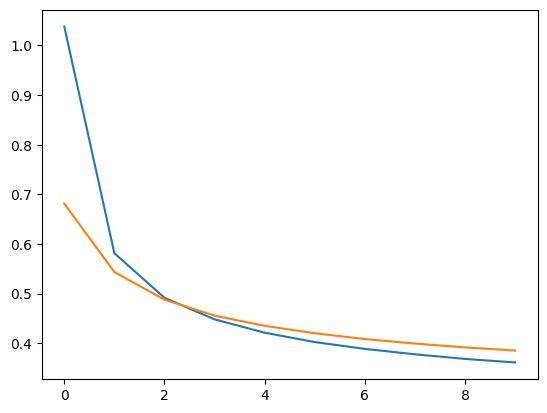

In [9]:
plt.plot(range(EPOCHS), losses)
plt.plot(range(EPOCHS), val_losses)


In [10]:
with torch.no_grad():
    pred = model(image_sample)
    print(pred)
    _, predicted = torch.max(pred, 1)

tensor([[-3.4886e+00, -1.1673e-03,  1.0235e+00,  3.1955e+00, -1.4117e+00,
         -1.0215e+00, -3.1955e+00,  2.3707e+00,  1.1755e+00,  2.0861e+00]])


In [11]:
predicted

tensor([3])

In [12]:

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total

print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

Accuracy of the model on the test set: 90.74%
